In [54]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

path = '/Users/User/snetworks-master/ParsingData/'
files = [el for el in os.listdir(path) if '.DS' not in el]
files

['ASTRAZEN.csv',
 'Bitcoin.csv',
 'Crude_oil.csv',
 'EEM.csv',
 'EU50.csv',
 'Generic.csv',
 'Gold.csv',
 'Large_profile.csv',
 'TCENY.csv',
 'TSLA.csv']

In [55]:
# data = pd.concat([pd.read_csv(path + file) for file in files])
ldata = []
for file in files:
    df = pd.read_csv(path + file)
    df['asset'] = file.split('.')[0]
    ldata.append(df)

data = pd.concat(ldata)
print(data.shape)
data.head(2)

(36834, 15)


,Unnamed: 0,index,geo,author_id,date,text,retweets,favorites,mentions,hashtags,link,day,username,followers,asset
0,0,1293295639942410240,NaN,1166772455417024512,2020-08-11 21:18:03,# Earnings # OSMT Recap: Osmotica Pharmaceutic...,0,0,0,2,https://twitter.com/dailytradingapp/status/129...,2020-08-11,dailytradingapp,183,ASTRAZEN
1,1,1293295636096274432,NaN,1166772455417024512,2020-08-11 21:18:02,# Earnings # KRNT Recap: Kornit Digital Q2 Ear...,0,0,0,2,https://twitter.com/dailytradingapp/status/129...,2020-08-11,dailytradingapp,183,ASTRAZEN


## Assuming all influencers may talk about any asset - tedious cleaning of data

In [56]:
# assets = list(data['asset'].unique())
assets_names_dict = {
    'TSLA': ['TSLA', 'Tesla'],
    'Gold': ['Gold'],
    'Bitcoin': ['BTC', 'Bitcoin'],
    'Crude_oil': ['Oil'],
    'EEM': ['EEM'],
    'TCENY': ['TCENY'],
    'ASTRAZEN': ['ASTRAZEN', 'AZN'],
    'EU50': ['EU50'],
    'AAPL': ['AAPL'],
    'SPY_SPX': ['SPY', 'SPX'],
    'AAL':['AAL']
}

In [57]:
def check_tickers_presence(text, tickers):
    try:
        if any([(f'$ {ticker.lower()}' in text.lower()) or (ticker.lower() in text.lower()) or (f'${ticker.lower()}' in text.lower()) \
                for ticker in tickers]):
            return 1
        return 0
    except (TypeError, AttributeError):
        return 0

In [58]:
for asset in list(assets_names_dict.keys()):
    data[f'{asset}_relevant'] = data['text'].apply(lambda x: check_tickers_presence(x, assets_names_dict[asset]))

relevant_coldict = {f'{asset}_relevant': 'sum' for asset in list(assets_names_dict.keys())}
relevant_coldict

{'TSLA_relevant': 'sum',
 'Gold_relevant': 'sum',
 'Bitcoin_relevant': 'sum',
 'Crude_oil_relevant': 'sum',
 'EEM_relevant': 'sum',
 'TCENY_relevant': 'sum',
 'ASTRAZEN_relevant': 'sum',
 'EU50_relevant': 'sum',
 'AAPL_relevant': 'sum',
 'SPY_SPX_relevant': 'sum',
 'AAL_relevant': 'sum'}

In [59]:
# adding columns only and dropping few columns
df = data[['username', 'text', 'followers', 'retweets', 'favorites', 'link', 'day'] +list(relevant_coldict.keys())].copy()
df.head(4)

,username,text,followers,retweets,favorites,link,day,TSLA_relevant,Gold_relevant,Bitcoin_relevant,Crude_oil_relevant,EEM_relevant,TCENY_relevant,ASTRAZEN_relevant,EU50_relevant,AAPL_relevant,SPY_SPX_relevant,AAL_relevant
0,dailytradingapp,# Earnings # OSMT Recap: Osmotica Pharmaceutic...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,0,0,0,0,0,0,0,0
1,dailytradingapp,# Earnings # KRNT Recap: Kornit Digital Q2 Ear...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,0,0,0,0,0,0,0,0
2,dailytradingapp,# Earnings # News Why Rada Electronics Stock I...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,0,0,0,0,0,0,0,0
3,dailytradingapp,# PAAS # whyitsmoving Why Pan American Silver'...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,0,0,0,0,0,0,0,0


In [60]:
def which_assets(x):
    try:
        return [el for el, i in zip(list(relevant_coldict.keys()), x) if i > 0][0]
    except IndexError:
        return ''
df['relevant'] = df[list(relevant_coldict.keys())].apply(which_assets, axis=1)

In [61]:
prep = df[df['relevant'] != ''].copy()
#print(prep.shape[0])
prep['index'] = [i for i in range(prep.shape[0])]
prep.head(3)

,username,text,followers,retweets,favorites,link,day,TSLA_relevant,Gold_relevant,Bitcoin_relevant,Crude_oil_relevant,EEM_relevant,TCENY_relevant,ASTRAZEN_relevant,EU50_relevant,AAPL_relevant,SPY_SPX_relevant,AAL_relevant,relevant,index
13,dailytradingapp,# BP # Chevron Can Oil Giants Play The Long Ga...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,1,0,0,0,0,0,0,0,Crude_oil_relevant,0
31,dailytradingapp,# Earnings # MRO Return On Capital Employed Ov...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,1,0,0,0,0,0,0,0,Crude_oil_relevant,1
32,dailytradingapp,# AAPL # DRIV 3 Electric Vehicle ETFs To Floor...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0,0,0,0,0,0,0,1,0,0,AAPL_relevant,2


In [62]:
all_tweets_df=prep[['index', 'relevant','username', 'text', 'followers', 'retweets', 'favorites','link', 'day']].copy()
all_tweets_df['relevant'] = all_tweets_df['relevant'].apply(lambda x: x[:-9]) # dropping '_relevant' suffix
all_tweets_df.rename(columns = {0:'orig_num', 'index':'number', 'relevant':'asset'}, inplace = True)
print(all_tweets_df.shape)
all_tweets_df.tail(4)

(5815, 9)


,number,asset,username,text,followers,retweets,favorites,link,day
5179,5811,TSLA,28delayslater,It’s a fact that @ WholeMarsBlog wants to be t...,13280,0,5,https://twitter.com/28delayslater/status/13032...,2020-09-08
5181,5812,TSLA,28delayslater,Going from my Tesla to an ICE car is quite pai...,13280,0,10,https://twitter.com/28delayslater/status/13036...,2020-09-09
5191,5813,TSLA,28delayslater,Nice to see $ TSLAQ hate # Tesla for “governme...,13280,18,119,https://twitter.com/28delayslater/status/13036...,2020-09-09
5209,5814,TSLA,28delayslater,Omg I will need more Teslas,13280,0,4,https://twitter.com/28delayslater/status/13035...,2020-09-09


# finalised Tweets DF... even in the case initially some files (i.e. Large_profile and Generic) were not created by clean cashtags and words

--norm_tweet_weight---


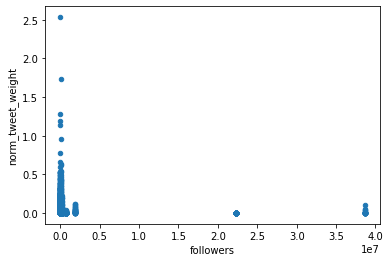

In [63]:
alpha=5  # calculating Absolute and Normalised (by # of followers) Tweet Indices

all_tweets_df['abs_tweet_weight']=all_tweets_df['favorites']+alpha*all_tweets_df['retweets']
#all_tweets_df.plot.scatter(x='followers', y='abs_tweet_weight')
all_tweets_df['norm_tweet_weight']=10.0*all_tweets_df['abs_tweet_weight']/(all_tweets_df['followers']+100) # ...+100 just to avoid dividing by zero
print('--norm_tweet_weight---')
all_tweets_df.plot.scatter(x='followers', y='norm_tweet_weight')  # useful scatter plots
#all_tweets_df.head(3)

# --Influencer_strength dependent on asset --- and --asset_strength---

--using---transform--username strength-
--using---transform--ASSET strength-


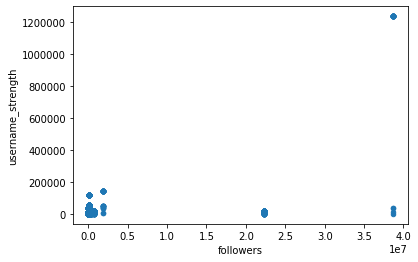

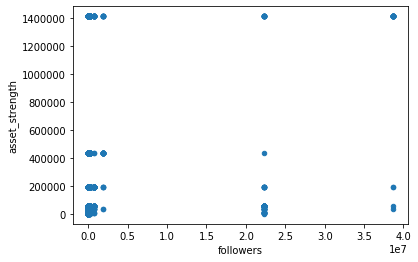

In [64]:
# Username strength dependent on asset
all_tweets_df['username_strength']= all_tweets_df.groupby(['asset','username'])['abs_tweet_weight'].transform('sum')
print('--using---transform--username strength-')
all_tweets_df.plot.scatter(x='followers', y='username_strength')  # useful scatter plots
#all_tweets_df.head(3)
all_tweets_df['asset_strength']= all_tweets_df.groupby(['asset'])['abs_tweet_weight'].transform('sum')
print('--using---transform--ASSET strength-')
all_tweets_df.plot.scatter(x='followers', y='asset_strength')  # useful scatter plots
#all_tweets_df.head(10)

# Tweet Importance and Confidence Indices

--tweet_imp_index = username strength / asset strength-
--tweet_imp_index = norm_tweet_weight * username strength / asset strength --- -


,number,asset,username,text,followers,retweets,favorites,link,day,abs_tweet_weight,norm_tweet_weight,username_strength,asset_strength,tweet_imp_index
13,0,Crude_oil,dailytradingapp,# BP # Chevron Can Oil Giants Play The Long Ga...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0.000000,5,57458,0.000000
31,1,Crude_oil,dailytradingapp,# Earnings # MRO Return On Capital Employed Ov...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0.000000,5,57458,0.000000
32,2,AAPL,dailytradingapp,# AAPL # DRIV 3 Electric Vehicle ETFs To Floor...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0.000000,17,14115,0.000000
63,3,AAPL,dailytradingapp,# AAPL # AMZN Tim Cook Now A Billionaire As Ap...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0.000000,17,14115,0.000000
64,4,AAPL,dailytradingapp,# AAPL # AmazonMusic Amazon Asks Podcasters To...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-11,0,0.000000,17,14115,0.000000
88,5,TSLA,dailytradingapp,# DebtInsights # News A Look Into Tesla's Debt...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-10,0,0.000000,120,1414539,0.000000
95,6,AAPL,dailytradingapp,# AAPL # ADUS Morning Market Stats in 5 Minute...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-10,0,0.000000,17,14115,0.000000
96,7,Gold,dailytradingapp,# direxion # FLYT How To Get Gold And Income I...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-10,0,0.000000,1,192120,0.000000
98,8,AAPL,dailytradingapp,# AAPL # AnalystColor Why iPhone 12 Will Be An...,183,0,0,https://twitter.com/dailytradingapp/status/129...,2020-08-10,0,0.000000,17,14115,0.000000
99,9,AAPL,dailytradingapp,# AAPL # ARGX 10 Biggest Price Target Changes ...,183,0,1,https://twitter.com/dailytradingapp/status/129...,2020-08-10,1,0.035336,17,14115,0.004256


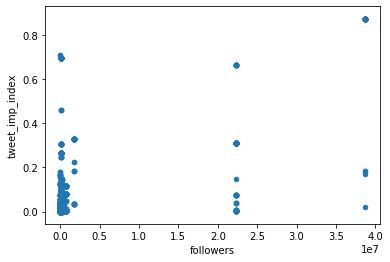

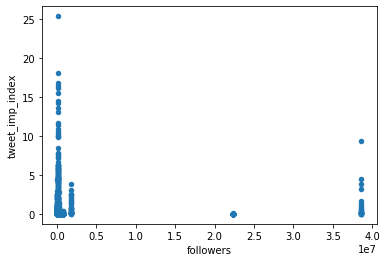

In [65]:
all_tweets_df['tweet_imp_index']= all_tweets_df['username_strength']/all_tweets_df['asset_strength']
print('--tweet_imp_index = username strength / asset strength-')
all_tweets_df.plot.scatter(x='followers', y='tweet_imp_index')  # useful scatter plots
#all_tweets_df.head(10)
all_tweets_df['tweet_imp_index']= all_tweets_df['norm_tweet_weight']* all_tweets_df['tweet_imp_index']*100
print('--tweet_imp_index = norm_tweet_weight * username strength / asset strength --- -')
all_tweets_df.plot.scatter(x='followers', y='tweet_imp_index')  # useful scatter plots
all_tweets_df.head(10)

--tweet_conf_index = abs_tweet_weight / AVERAGE(abs_tweet_weight)_over_(assets, tweets) ------


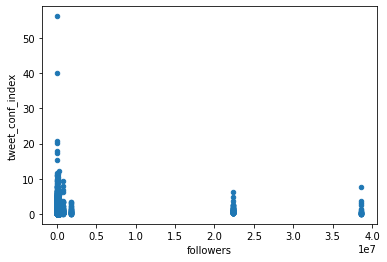

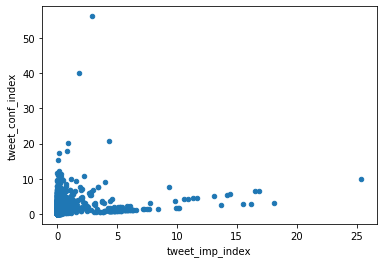

In [66]:
# confidence index
all_tweets_df['tweet_conf_index']= all_tweets_df.groupby(['username'])['abs_tweet_weight'].transform('mean')
all_tweets_df['tweet_conf_index']=all_tweets_df['abs_tweet_weight']/(all_tweets_df['tweet_conf_index'] + 1) # avoid dividing by ZERO
print('--tweet_conf_index = abs_tweet_weight / AVERAGE(abs_tweet_weight)_over_(assets, tweets) ------')
all_tweets_df.plot.scatter(x='followers', y='tweet_conf_index')  # useful scatter plots
all_tweets_df.tail(10)
#print(all_tweets_df.shape)
all_tweets_df.plot.scatter(x='tweet_imp_index', y='tweet_conf_index')  # useful scatter plots

# Droping not needed columns, taking top-10, and Saving

In [67]:
# droping some columns from tweets info
output= all_tweets_df.drop(['number','abs_tweet_weight','username_strength', 'asset_strength', 'norm_tweet_weight'], axis=1)
# top-tweets by username
output.sort_values(['username','tweet_imp_index']).groupby('username').tail(3) #of main interest

,asset,username,text,followers,retweets,favorites,link,day,tweet_imp_index,tweet_conf_index
837,Bitcoin,100trillionUSD,"# Bitcoin looking strong, RSI 64, bull market ...",131978,883,3785,https://twitter.com/100trillionUSD/status/1295...,2020-08-18,16.487689,6.407654
819,Bitcoin,100trillionUSD,3rd red dot (currently $11850) above 2nd red d...,131978,937,3708,https://twitter.com/100trillionUSD/status/1294...,2020-08-16,16.875753,6.558468
954,Bitcoin,100trillionUSD,$11880 (Sept actual) $11655 (Aug close) $11356...,131978,1484,5209,https://twitter.com/100trillionUSD/status/1300...,2020-09-01,25.393052,9.868568
4261,TSLA,28delayslater,“We’ve recast the position” Jim singing the sa...,13280,51,456,https://twitter.com/28delayslater/status/12961...,2020-08-19,1.340892,5.737977
4620,TSLA,28delayslater,$ TSLA owners not making any moves.pic.twitter...,13280,45,493,https://twitter.com/28delayslater/status/12979...,2020-08-24,1.354093,5.794469
...,...,...,...,...,...,...,...,...,...,...
666,Gold,sunchartist,"Update Stocks, Bonds, TIP’s, Bonds, HY, Gold, ...",26636,29,126,https://twitter.com/sunchartist/status/1301952...,2020-09-04,0.043896,15.260818
826,Crude_oil,tradingcrudeoil,Crude oil closed higher on Wednesday. If we co...,19992,1,2,https://twitter.com/tradingcrudeoil/status/129...,2020-08-20,0.000133,2.147239
837,AAPL,tradingcrudeoil,High Flying # Covid19 Sectors May Be Setting U...,19992,1,0,https://twitter.com/tradingcrudeoil/status/129...,2020-08-23,0.000388,1.533742
865,AAPL,tradingcrudeoil,Seeing Beyond the Black Swan Event - Part II >...,19992,3,2,https://twitter.com/tradingcrudeoil/status/130...,2020-09-05,0.001319,5.214724


In [70]:
# top-tweets ordered by tweet_imp_index
output1= output.sort_values(['asset','tweet_imp_index']).groupby('asset').tail(10) #of main interest
output1.sort_values(['asset', 'tweet_imp_index'], ascending=False).to_excel('/Users/User/snetworks-master/EXCELoutputData/top_importance_tweets.xlsx')

# top-tweets ordered by   tweet_conf_index
output2= output.sort_values(['asset','tweet_conf_index']).groupby('asset').tail(10) #of main interest
output2.sort_values(['asset', 'tweet_conf_index'], ascending=False).to_excel('/Users/User/snetworks-master/EXCELoutputData/top_confidence_tweets.xlsx')


# Testing - top-tweets, etc

In [ ]:
# top-tweets by norm_tweet_weight
#by asset
group6_asset=all_tweets_df.sort_values(['asset','norm_tweet_weight']).groupby('asset').tail(3) #of main interest
print(group6_asset.shape)
group6_asset.plot.scatter(x='followers', y='norm_tweet_weight')  # useful scatter plots
group6_asset

# by username
group6_username=all_tweets_df.sort_values(['username','norm_tweet_weight']).groupby('username').tail(2) #of main interest
print(group6_username.shape)
group6_username.plot.scatter(x='followers', y='norm_tweet_weight')  # useful scatter plots
group6_username

# calculate Influencer activity and Asset activity

In [ ]:
infl_activity = all_tweets_df.groupby(['asset','username'], as_index=False).agg({'followers':np.mean,
                            'retweets':sum, 
                            'favorites':sum,
                            'abs_tweet_weight':sum,
                            'n_tweets':sum  
                             })
#infl_activity.plot.scatter(x='n_tweets', y='abs_tweet_weight')
infl_activity

asset_activity = infl_activity.groupby(['asset'], as_index=False).agg({
                            'n_tweets':sum,  
                            'abs_tweet_weight':sum  #,'username':np.char.count,
                             })
asset_activity 
#asset_activity.sort_values(['abs_tweet_weight'], ascending=False)

#infl_activity['norm_Trank'] = 1.0 

# ..........................how to reWRITE this calculation below with.... groupby 

for i in range(infl_activity.shape[0]):
    for j in range(asset_activity.shape[0]):
        if asset_activity['asset'][j] == infl_activity['asset'][i]:
            infl_activity['norm_Trank'][i] = infl_activity['abs_tweet_weight'][i]/asset_activity['abs_tweet_weight'][j]
        else:
            -1
                   
infl_activity